# Reading a Buffer

This jupyter notebook reads a buffer and plots all it's attributes over the event numbers. You can use whichever buffer you want by simply selecting a data file and tweaking the appropriate parameters on the setup block below

In [1]:
# import necessary modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import to_hex
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import os

import raadpy as rp

# Define some constants
raw_dir = '../../Data/RAW/'
SD      = 'SD-1030'
# SD      = 'LEOP_Data'

# Print the tree of the raw data directory
for root, dirs, files in os.walk(raw_dir):
    level = root.replace(raw_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print('{}{}'.format(subindent, f))

%matplotlib widget

/
    .DS_Store
SD-915/
    Light1_2022-05-20_Buff7.dat
    test.txt
    Light1-OperationalTest_May23_ScriptLog.txt
    Light1_2022-05-20_Buff6.dat
    Light1_2022-05-20_Buff5.dat
    Light1_2022-05-20_Buff4.dat
    Light1_2022-05-20_Buff1.dat
    dat.csv
    Light1_2022-05-20_Buff8.dat
    VetoDecoder
    OperatingScript20May23May.txt
SD-930/
    light1-SD-930-buff4.dat
    light1-SD-930-buff5.dat
    light1-SD-930-se-log.txt
    light1-SD-930-buff7.dat
    light1-SD-930-buff1.dat
    light1-SD-930-buff6.dat
SD-938/
    light1-SD-938-buff5.dat
    light1-SD-938-buff1.dat
    light1-SD-938-buff4.dat
    light1-SD-938-buff6.dat
    light1-SD-938-se-log.txt
    light1-SD-938-buff7.dat
SD-980/
    light1-SD-980-buff1.dat
    light1-SD-980-buff5.dat
    light1-SD-980-buff7.dat
    light1-SD-980-se-log.txt
    light1-SD-980-buff6.dat
    light1-SD-980-buff4.dat
SD-1015/
    light1-SD-1015-buff8.dat
    light1-SD-1015-buff4.dat
    light1-SD-1015-se-log.txt
    light1-SD-1015-buff2.dat
    l

# Orbit Buffer Data

First we collect the data from the orbit buffer, then we split based on the detector id and then plot

In [13]:
# Directory of the buffer
# buffer_fname    = raw_dir + SD + '/light1-'+SD+'-buff1.dat'
# Or:
buffer_fname    =  "../../Data/RAW/LEOP_Data/Orbit/Light1_2022-05-06_Buff1.dat"
fname           = buffer_fname.split('/')[6]

# Decode the buffer data in a dictionary
data_SiPM   = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT,condition="data['id_bit'] == 1")
data_PMT    = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT,condition="data['id_bit'] == 0")
# data_full   = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT)

Line:   0%|          | 0/3095 [00:00<?, ?it/s]

Line:   0%|          | 0/3095 [00:00<?, ?it/s]

In [ ]:
# Now print the full Data
fig, axes = rp.plot_buffer(data_full,title = 'Orbit Data of both Detectors from File: '+ fname,UNITS=rp.ORBIT_UNITS)

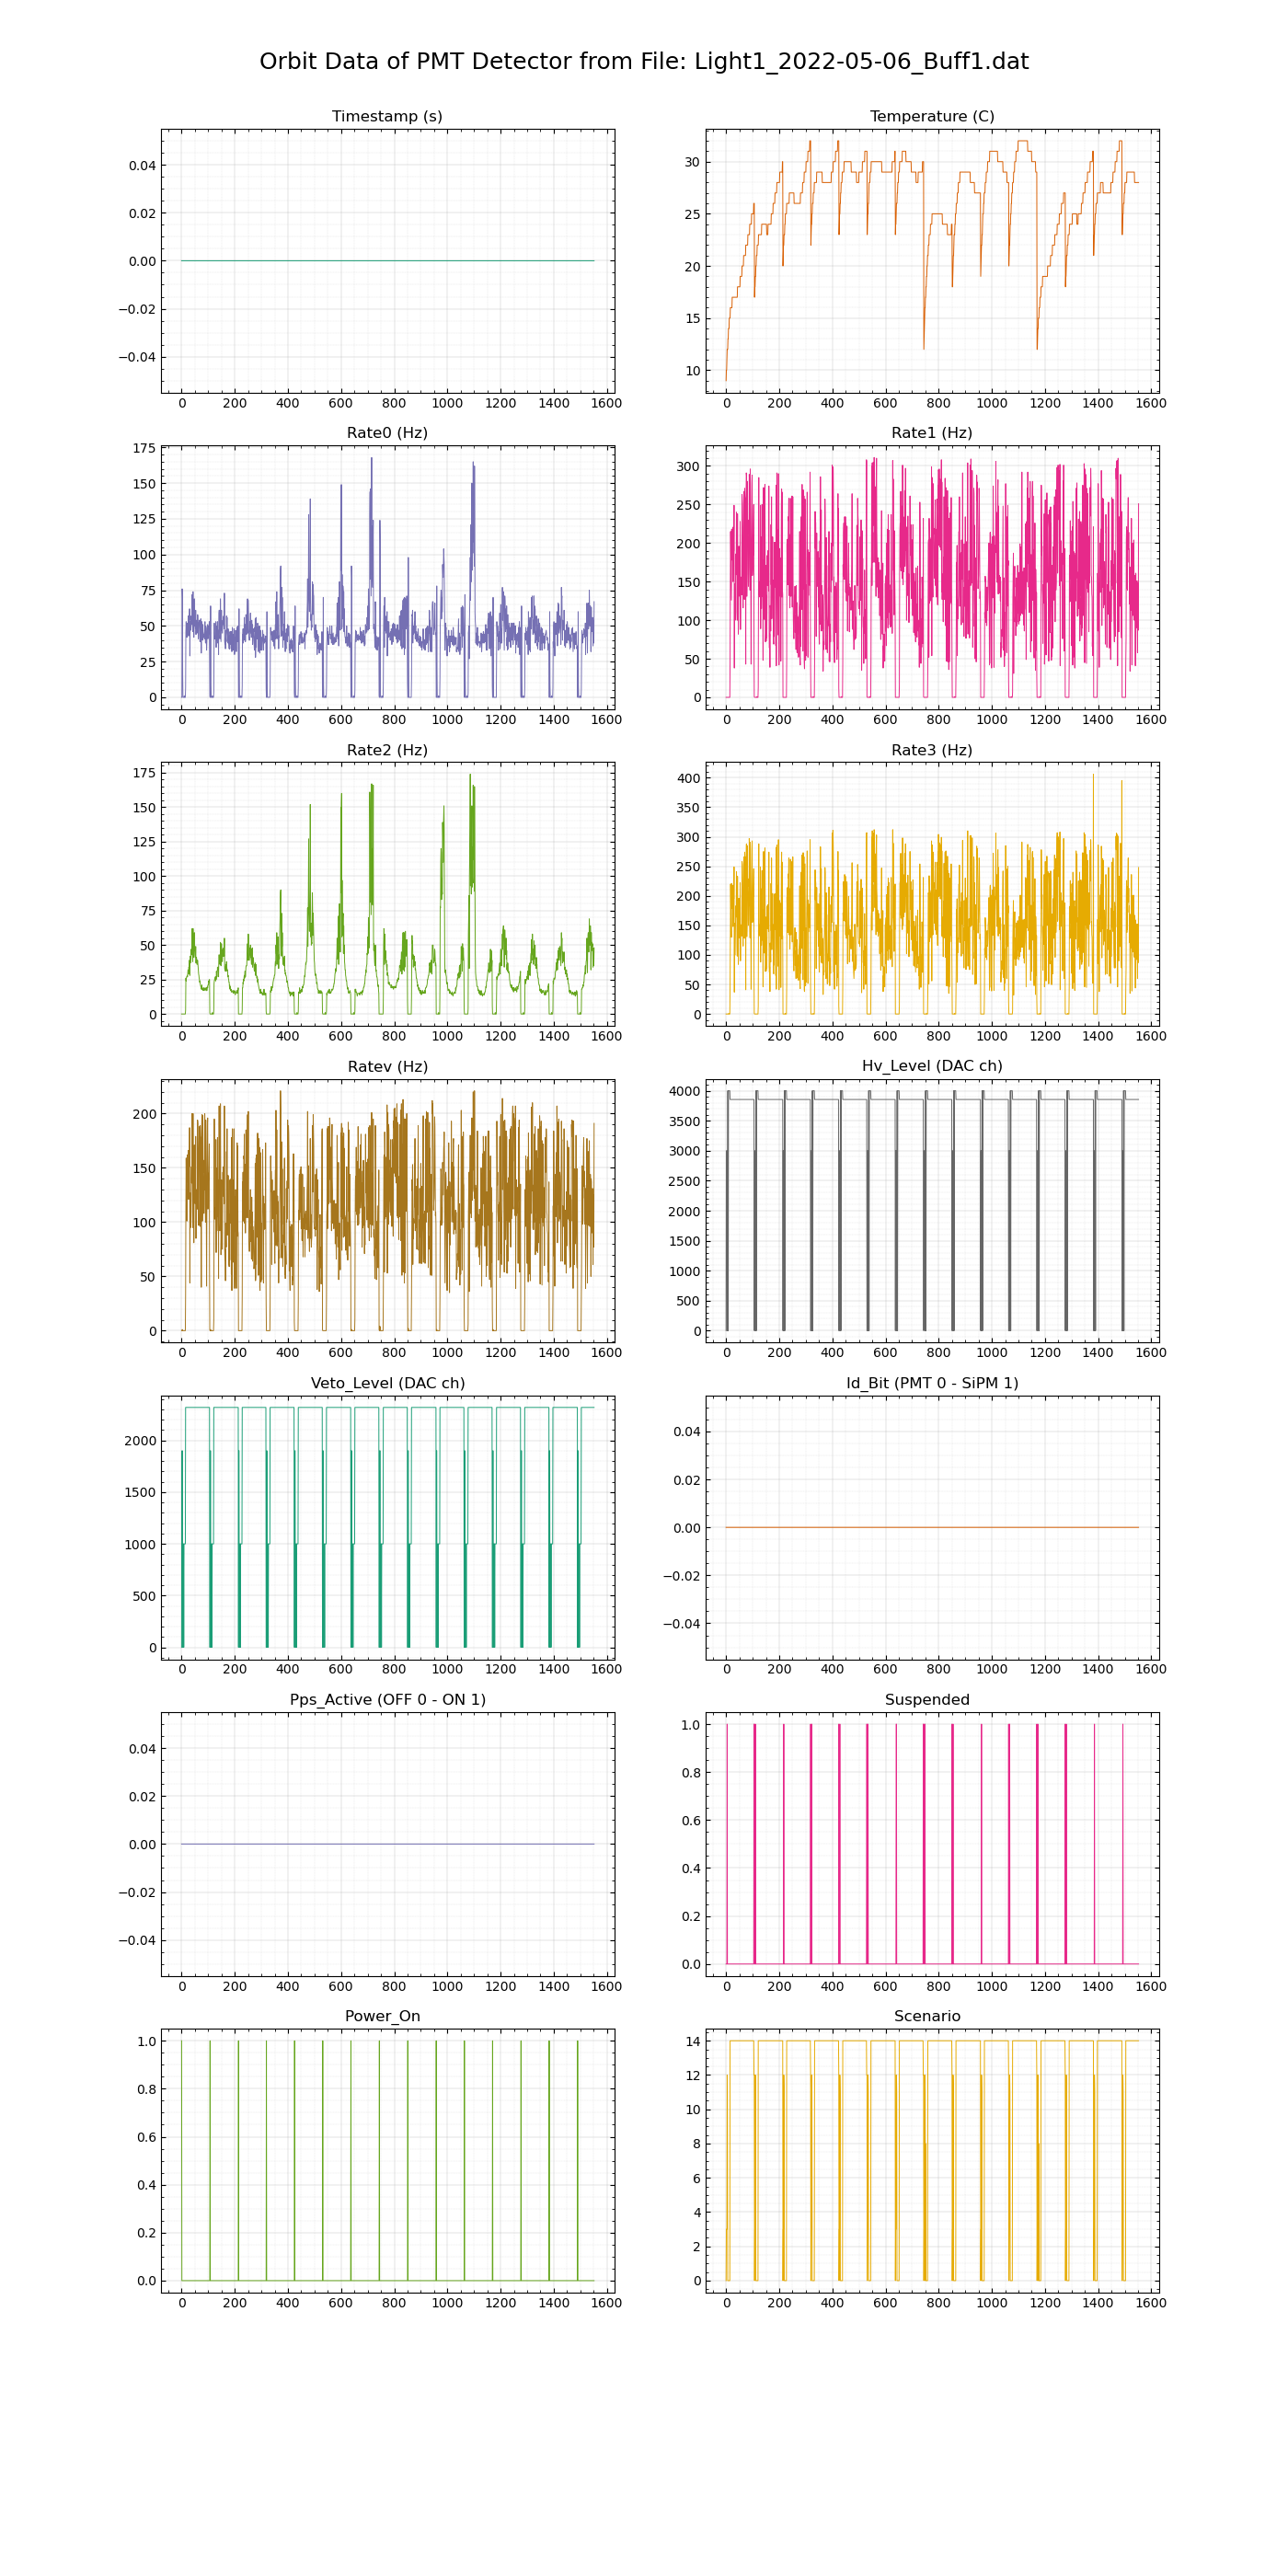

In [14]:
# Now print the PMT Data
fig, axes  = rp.plot_buffer(data_PMT,title = 'Orbit Data of PMT Detector from File: '+ fname,UNITS=rp.ORBIT_UNITS)

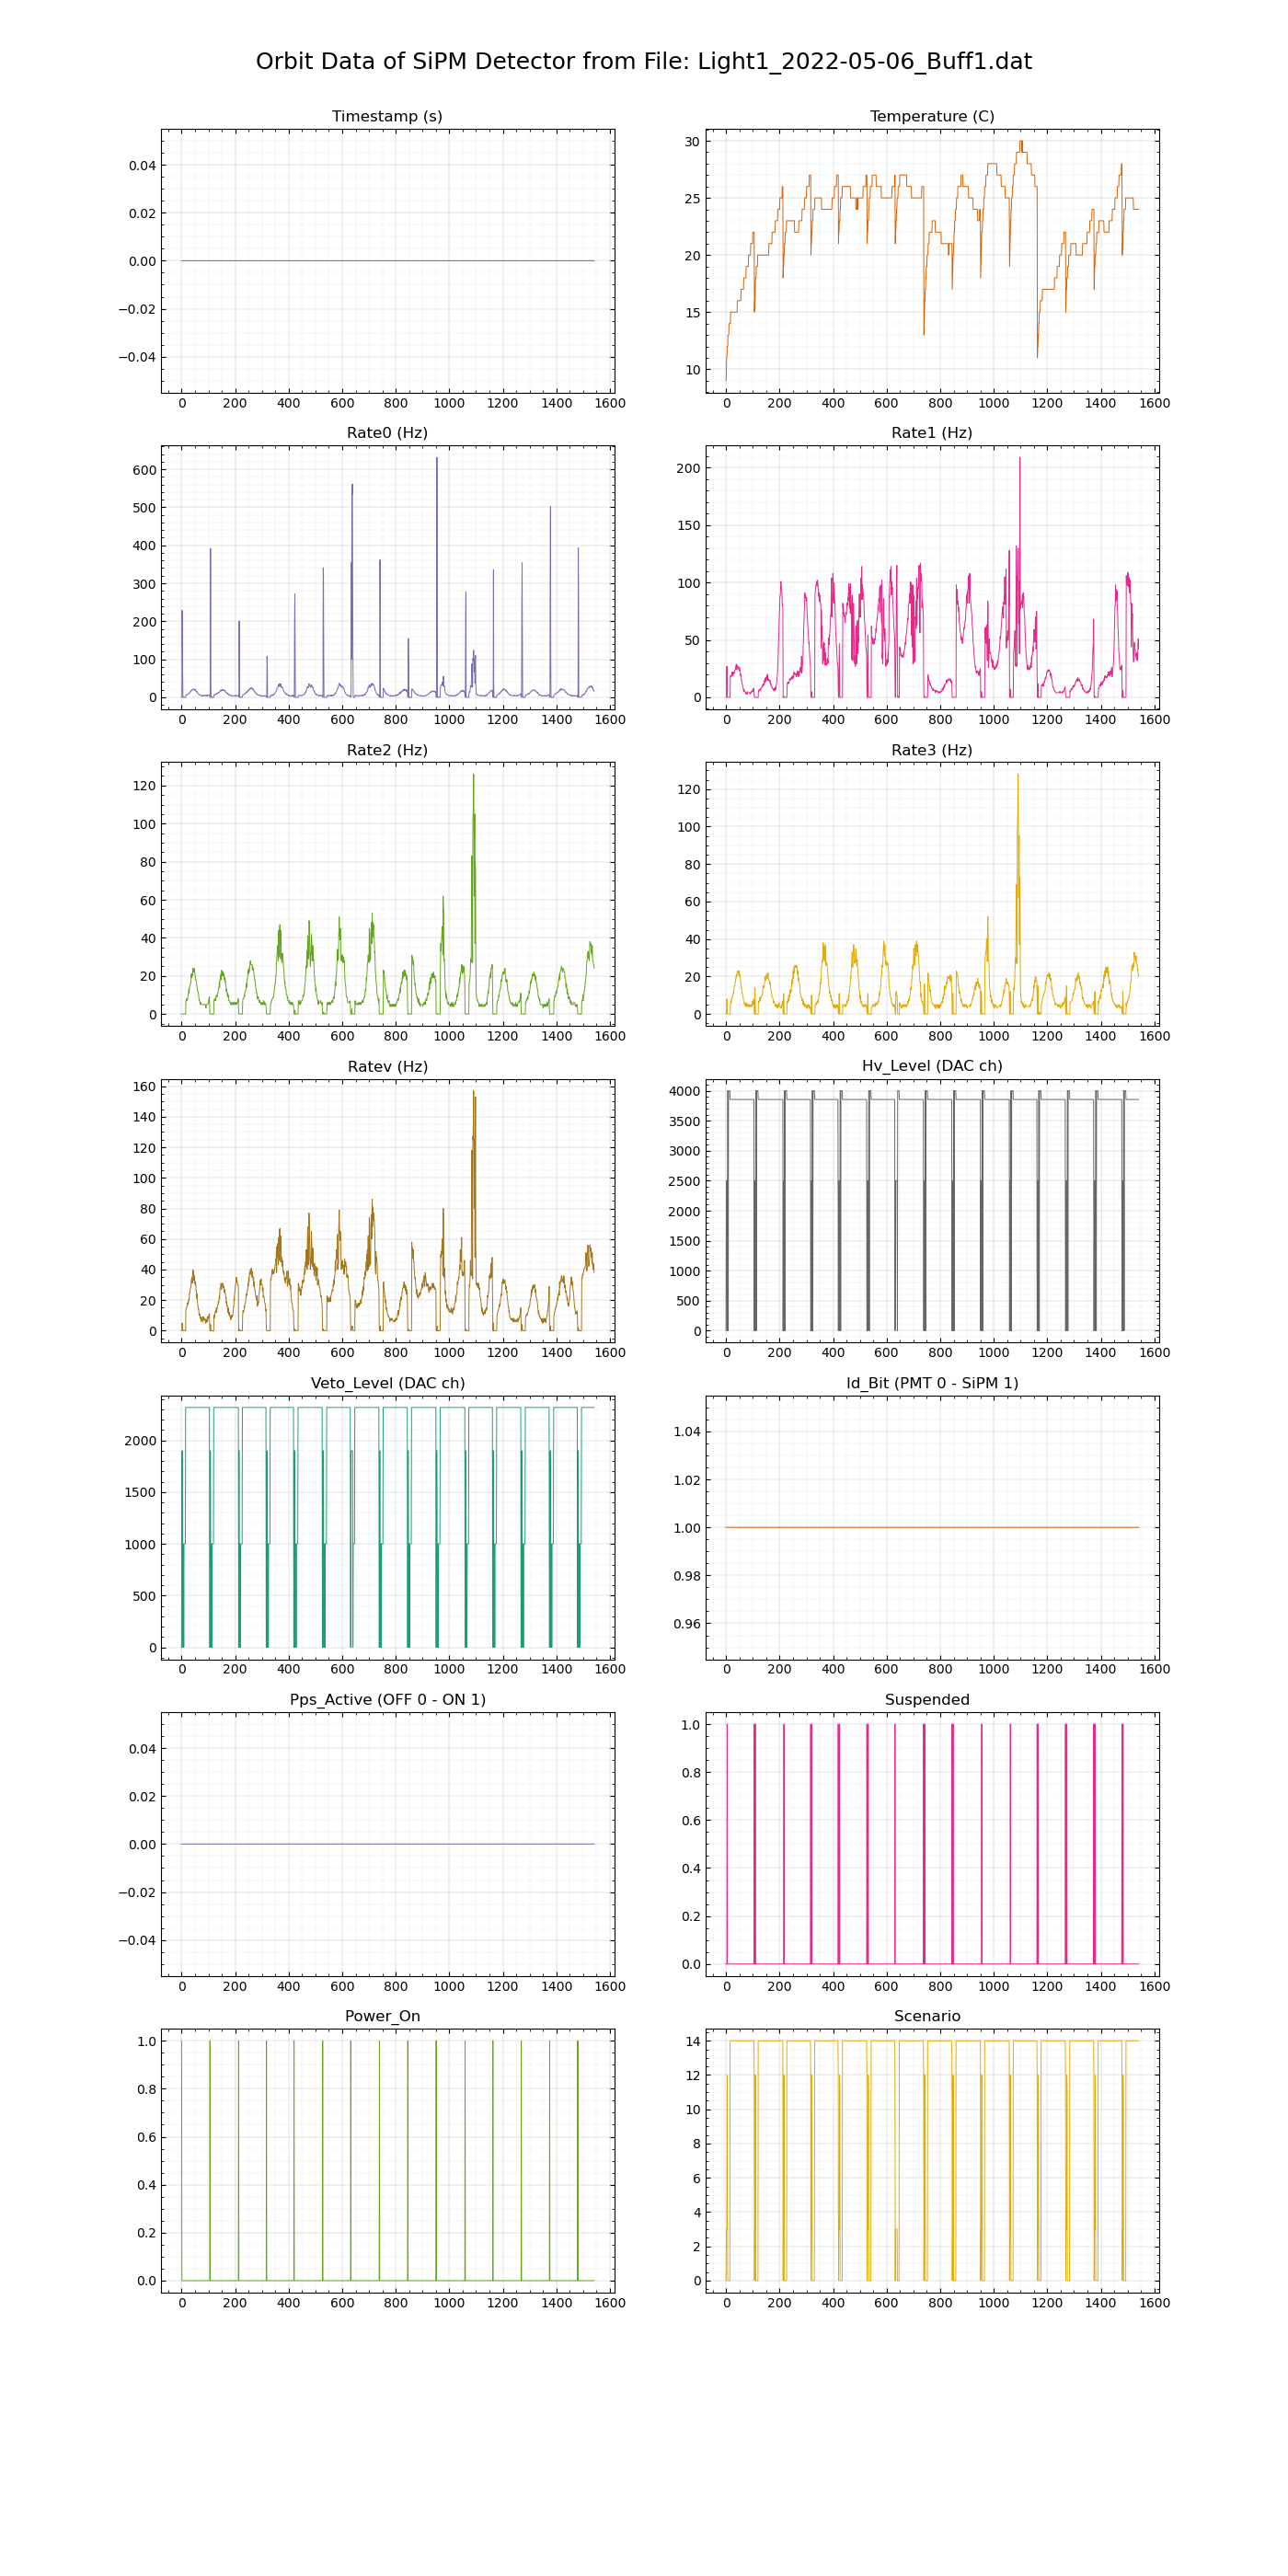

In [15]:
# Print the SiPM Data
fig, axes = rp.plot_buffer(data_SiPM, title = 'Orbit Data of SiPM Detector from File: '+ fname,UNITS=rp.ORBIT_UNITS)

# Veto Buffer Data

We collect both the PMT and SiPM data from the Veto buffers and then plot

In [4]:
# Directory of the buffer
buffer_fname    = raw_dir + SD + '/light1-'+SD+'-buff6.dat'

# Decode the buffer data in a dictionary
data_SiPM_v     = rp.get_dict(buffer_fname,struct=rp.VETO_STRUCT,MAX=None,STUPID=True)

# Directory of the buffer
buffer_fname    = raw_dir + SD + '/light1-'+SD+'-buff7.dat'

# Decode the buffer data in a dictionary
data_PMT_v      = rp.get_dict(buffer_fname,struct=rp.VETO_STRUCT,MAX=None,STUPID=True)

Line: : 0it [00:00, ?it/s]

Line:   0%|          | 0/617 [00:00<?, ?it/s]

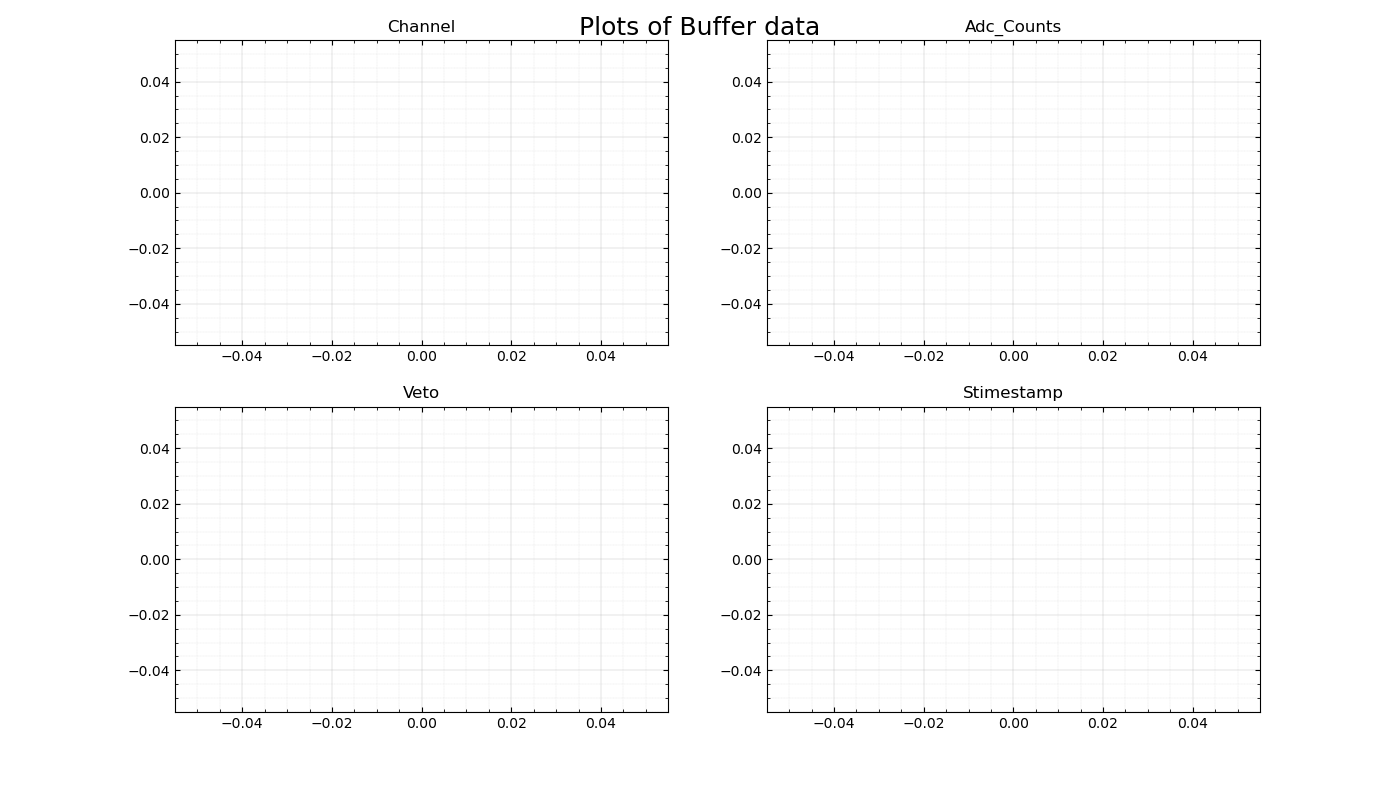

In [5]:
# Print the SiPM Data
fig, axes = rp.plot_buffer(data_SiPM_v)

In [6]:
# Plot histograms
fig,ax = rp.plot_hists(data_SiPM_v,struct=rp.VETO_STRUCT)

ValueError: Number of rows must be a positive integer, not 0

SystemError: tile cannot extend outside image

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

In [7]:
# Plot timestamps
fig,ax = rp.plot_timestamps(data_SiPM_v,RANGE=(0,1000),struct=rp.VETO_STRUCT)

ValueError: Number of rows must be a positive integer, not 0

SystemError: tile cannot extend outside image

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/nyuad/miniconda3/envs/RAAD/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1035896/1977892044.py", line 2, in <cell line: 2>
    fig,ax = rp.plot_timestamp(data_SiPM_v,RANGE=(15000,17000))
  File "/home/nyuad/RAAD/raadpy/src/raadpy/plotting.py", line 216, in plot_timestamp
  File "/home/nyuad/miniconda3/envs/RAAD/lib/python3.10/site-packages/matplotlib/axes/_axes.py", line 1632, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/home/nyuad/miniconda3/envs/RAAD/lib/python3.10/site-packages/matplotlib/axes/_base.py", line 312, in __call__
    yield from self._plot_args(this, kwargs)
  File "/home/nyuad/miniconda3/envs/RAAD/lib/python3.10/site-packages/matplotlib/axes/_base.py", line 498, in _plot_args
    raise ValueError(f"x and y must have same first dimension, but "
ValueError: x and y must have sa

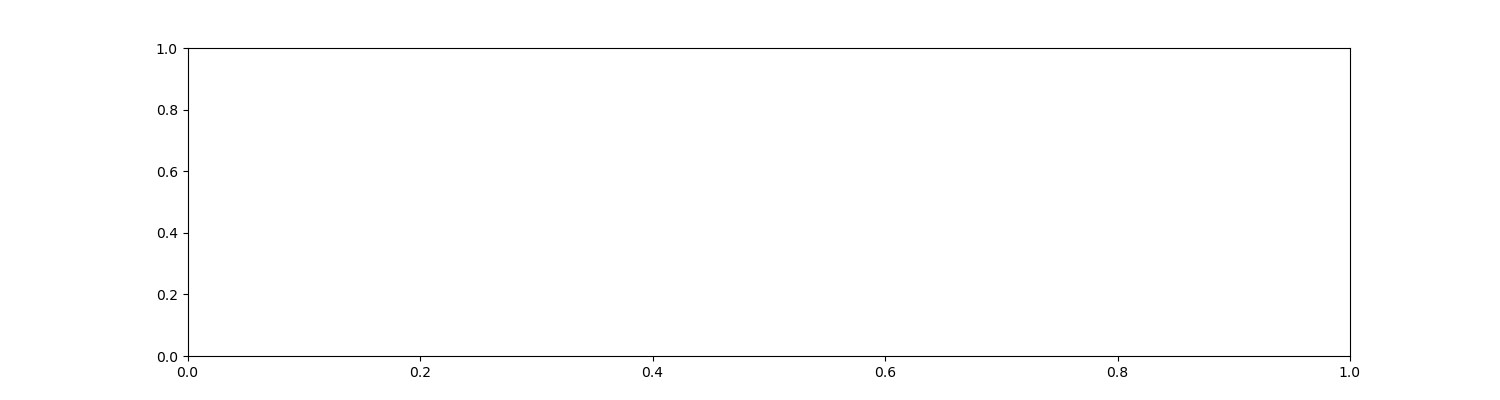

In [8]:
# Plot timestamps of all events
fig,ax = rp.plot_timestamp(data_SiPM_v,RANGE=(15000,17000))

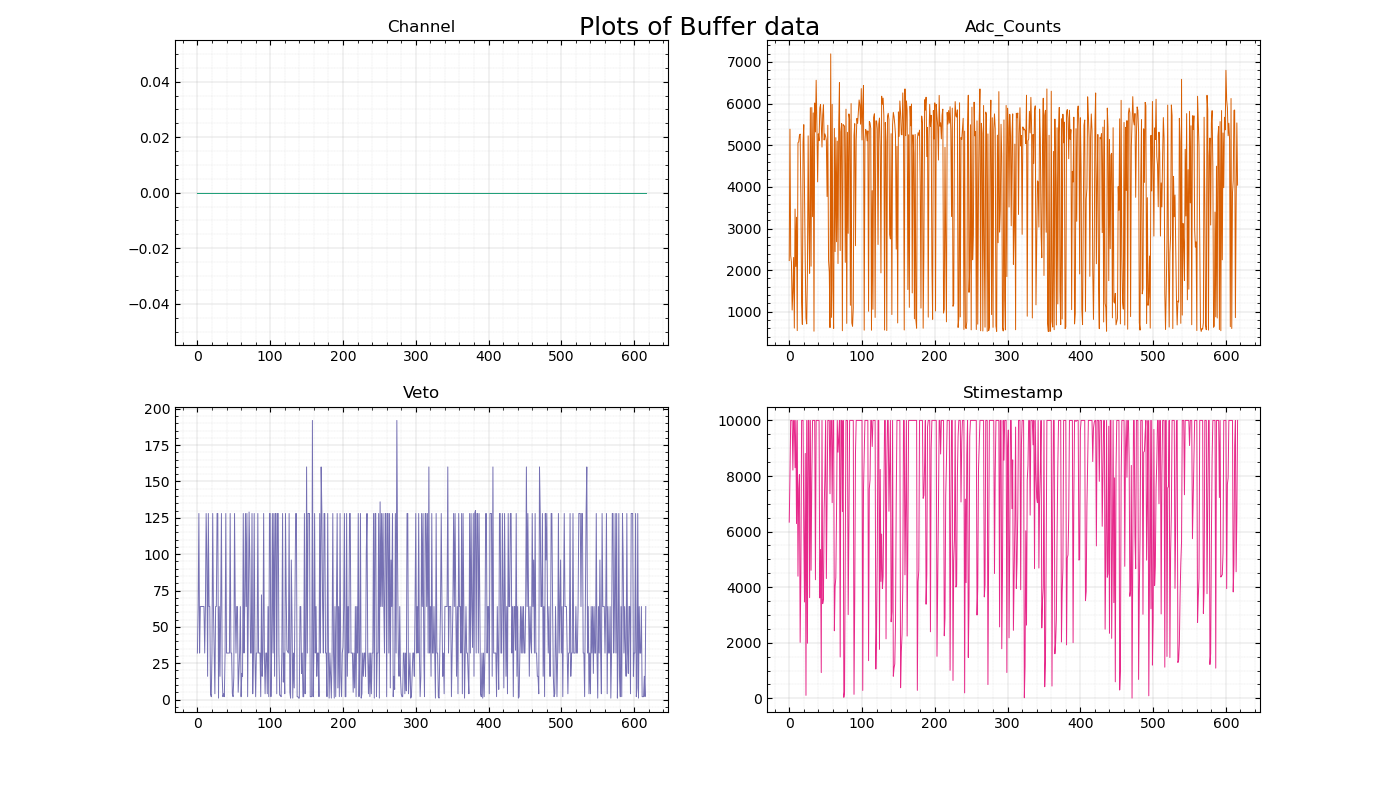

In [9]:
# Now print the PMT Data
fig, axes = rp.plot_buffer(data_PMT_v)

AttributeError: 'AxesSubplot' object has no attribute 'flatten'

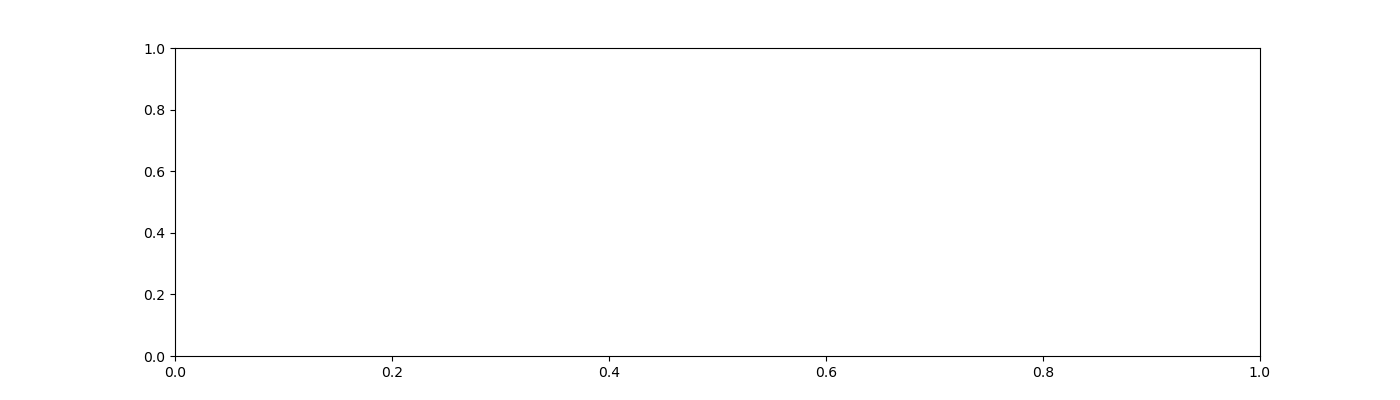

In [10]:
# Plot histograms
fig,ax = rp.plot_hists(data_PMT_v,struct=rp.VETO_STRUCT)

AttributeError: 'AxesSubplot' object has no attribute 'flatten'

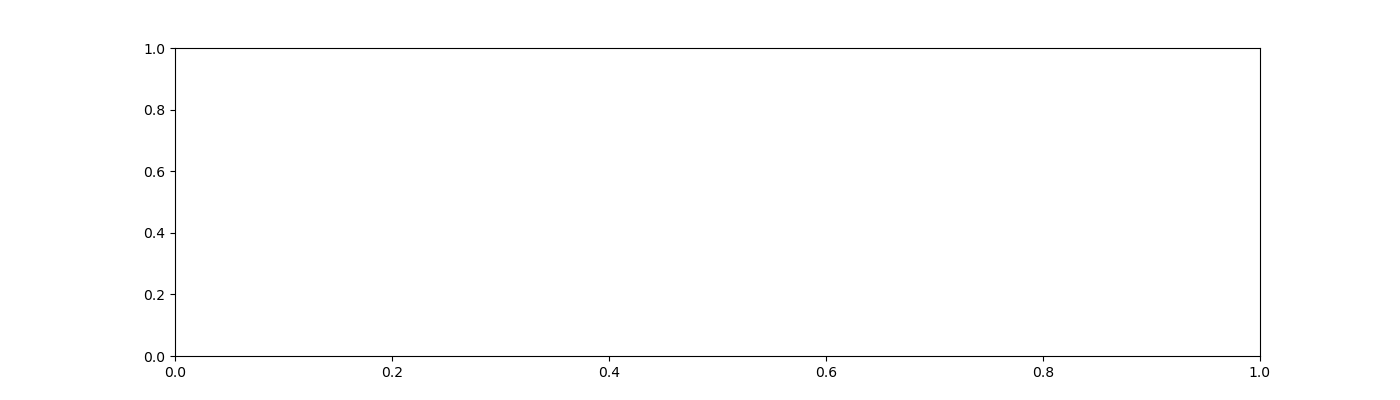

In [11]:
# Plot timestamps
fig,ax = rp.plot_timestamps(data_PMT_v,RANGE=(0,1000),struct=rp.VETO_STRUCT)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/nyuad/miniconda3/envs/RAAD/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1035896/2657823331.py", line 2, in <cell line: 2>
    fig,ax = rp.plot_timestamp(data_PMT_v,RANGE=(0,1500))
  File "/home/nyuad/RAAD/raadpy/src/raadpy/plotting.py", line 216, in plot_timestamp
  File "/home/nyuad/miniconda3/envs/RAAD/lib/python3.10/site-packages/matplotlib/axes/_axes.py", line 1632, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/home/nyuad/miniconda3/envs/RAAD/lib/python3.10/site-packages/matplotlib/axes/_base.py", line 312, in __call__
    yield from self._plot_args(this, kwargs)
  File "/home/nyuad/miniconda3/envs/RAAD/lib/python3.10/site-packages/matplotlib/axes/_base.py", line 498, in _plot_args
    raise ValueError(f"x and y must have same first dimension, but "
ValueError: x and y must have same fir

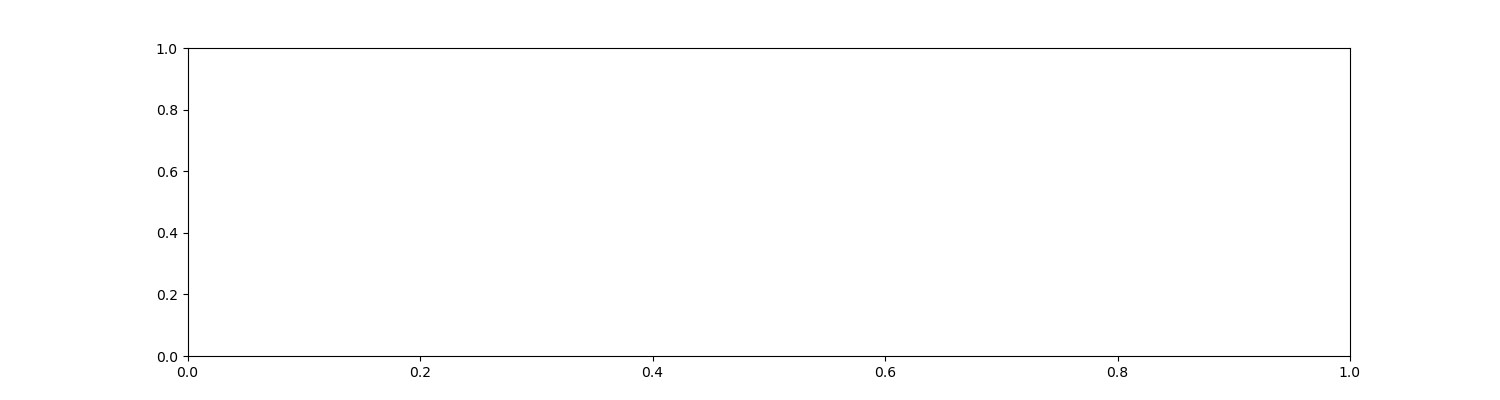

In [12]:
# Plot timestamps of all events
fig,ax = rp.plot_timestamp(data_PMT_v,RANGE=(0,1500))

# Non Veto Buffer Data

We collect both the PMT and SiPM data from the NON Veto buffers and then plot

In [13]:
# Directory of the buffer
buffer_fname    = raw_dir + SD + '/light1-'+SD+'-buff4.dat'

# Decode the buffer data in a dictionary
data_SiPM_nv    = rp.get_dict(buffer_fname,struct=rp.NONVETO_STRUCT,MAX=100000,STUPID=True)

# Directory of the buffer
buffer_fname    = raw_dir + SD + '/light1-'+SD+'-buff5.dat'

# Decode the buffer data in a dictionary
data_PMT_nv     = rp.get_dict(buffer_fname,struct=rp.NONVETO_STRUCT,MAX=100000,STUPID=True)

Line:   0%|          | 0/100000 [00:00<?, ?it/s]

Line:   0%|          | 0/100000 [00:00<?, ?it/s]

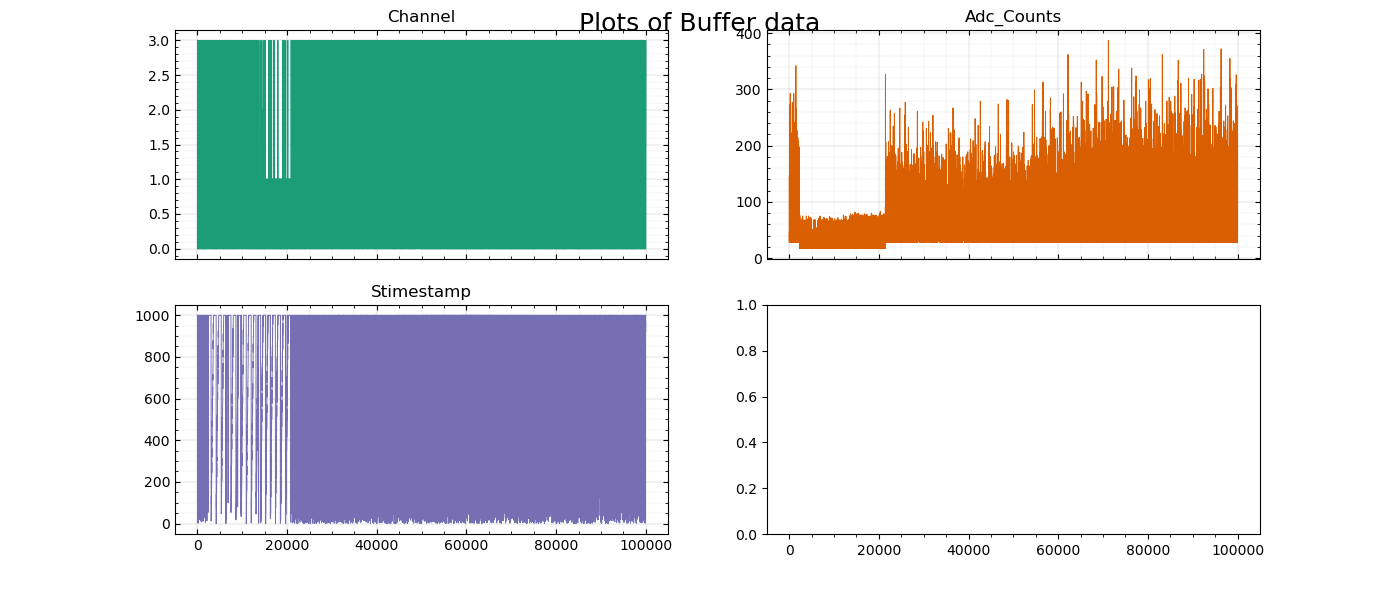

In [24]:
# Print the SiPM Data
fig, axes = rp.plot_buffer(data_SiPM_nv)

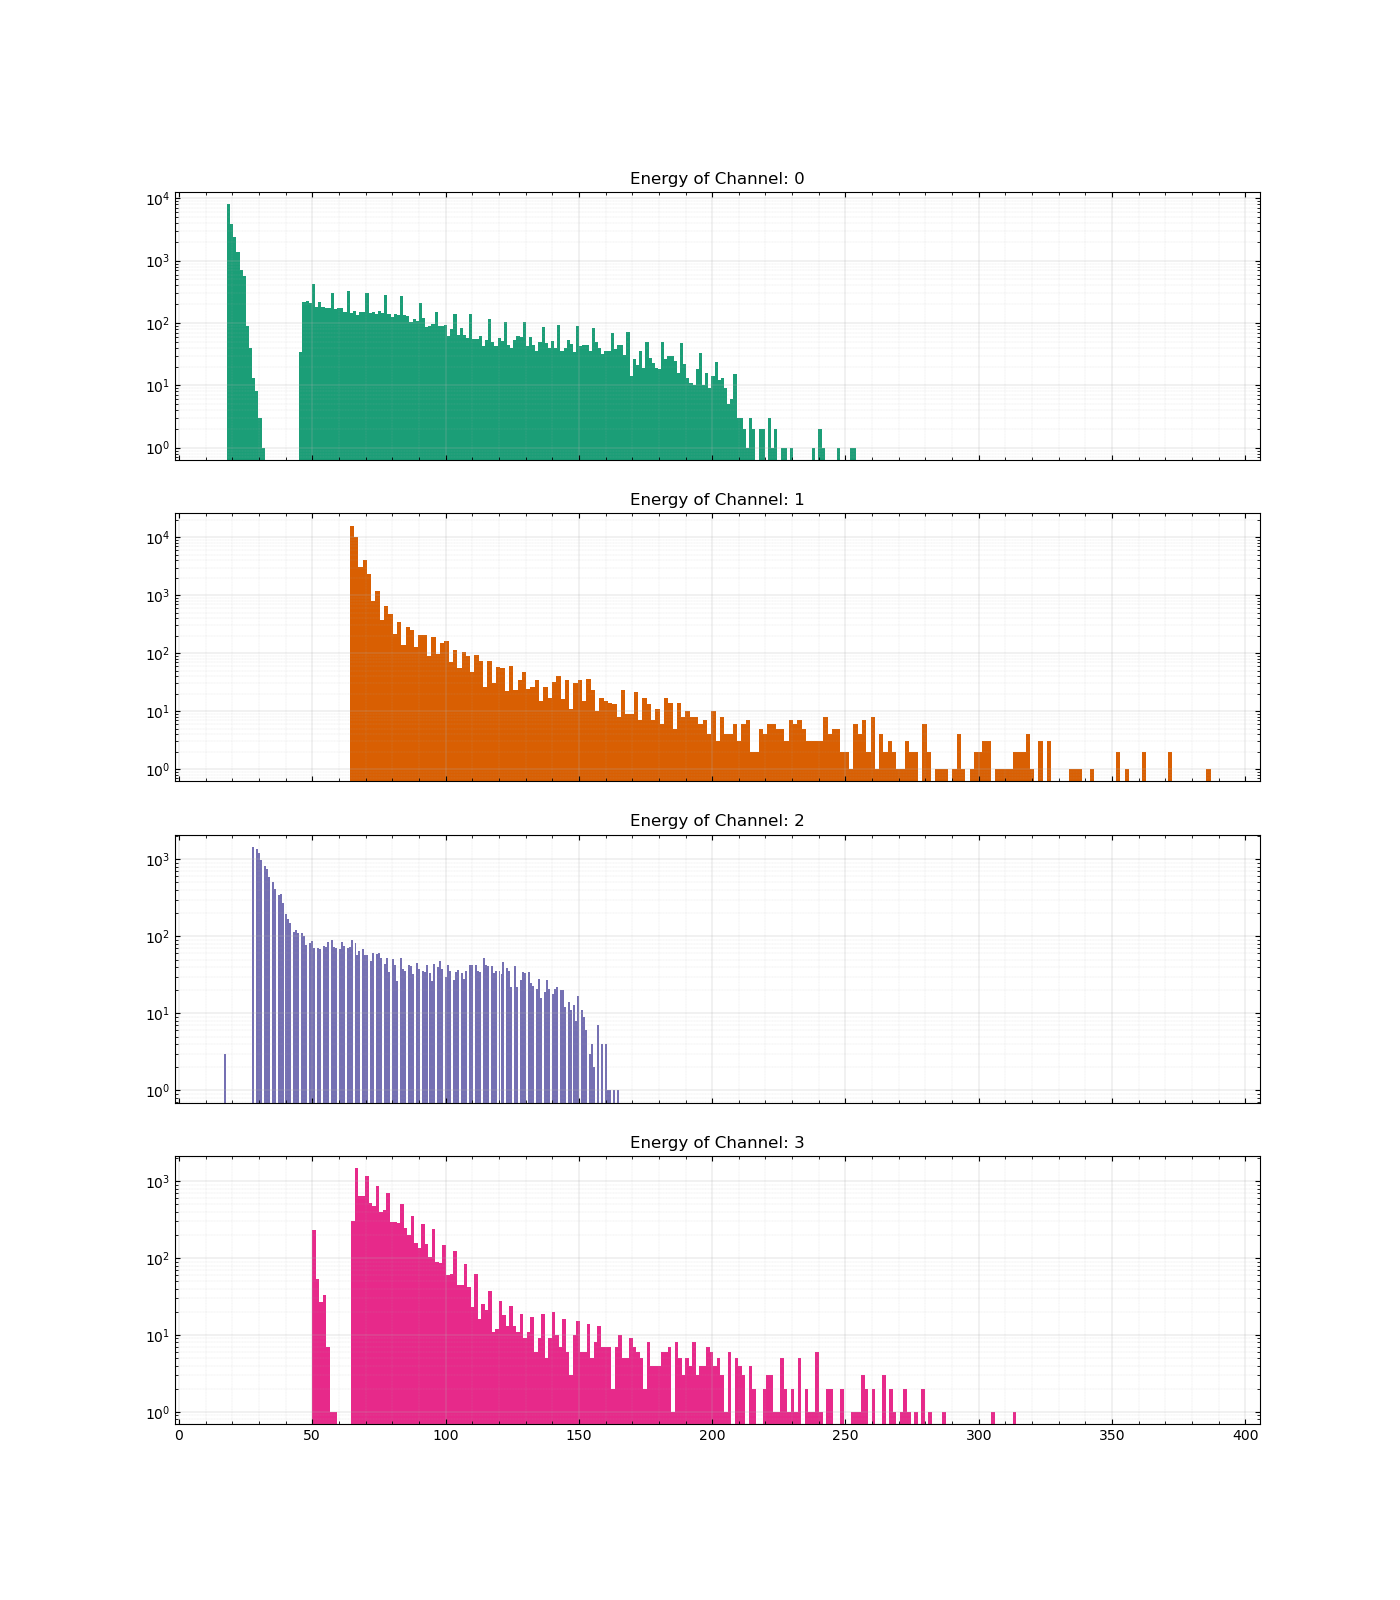

In [25]:
# Plot histograms
fig,ax = rp.plot_hists(data_SiPM_nv,struct=rp.NONVETO_STRUCT,bins=200)

/Users/panos/Documents/NYU/6.Extracurricular/23.Cubesat/raad/raadpy/src/raadpy/plotting.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax  = plt.subplots(len(channels),1,figsize=(14,4*len(channels)),dpi=100,sharex=True)


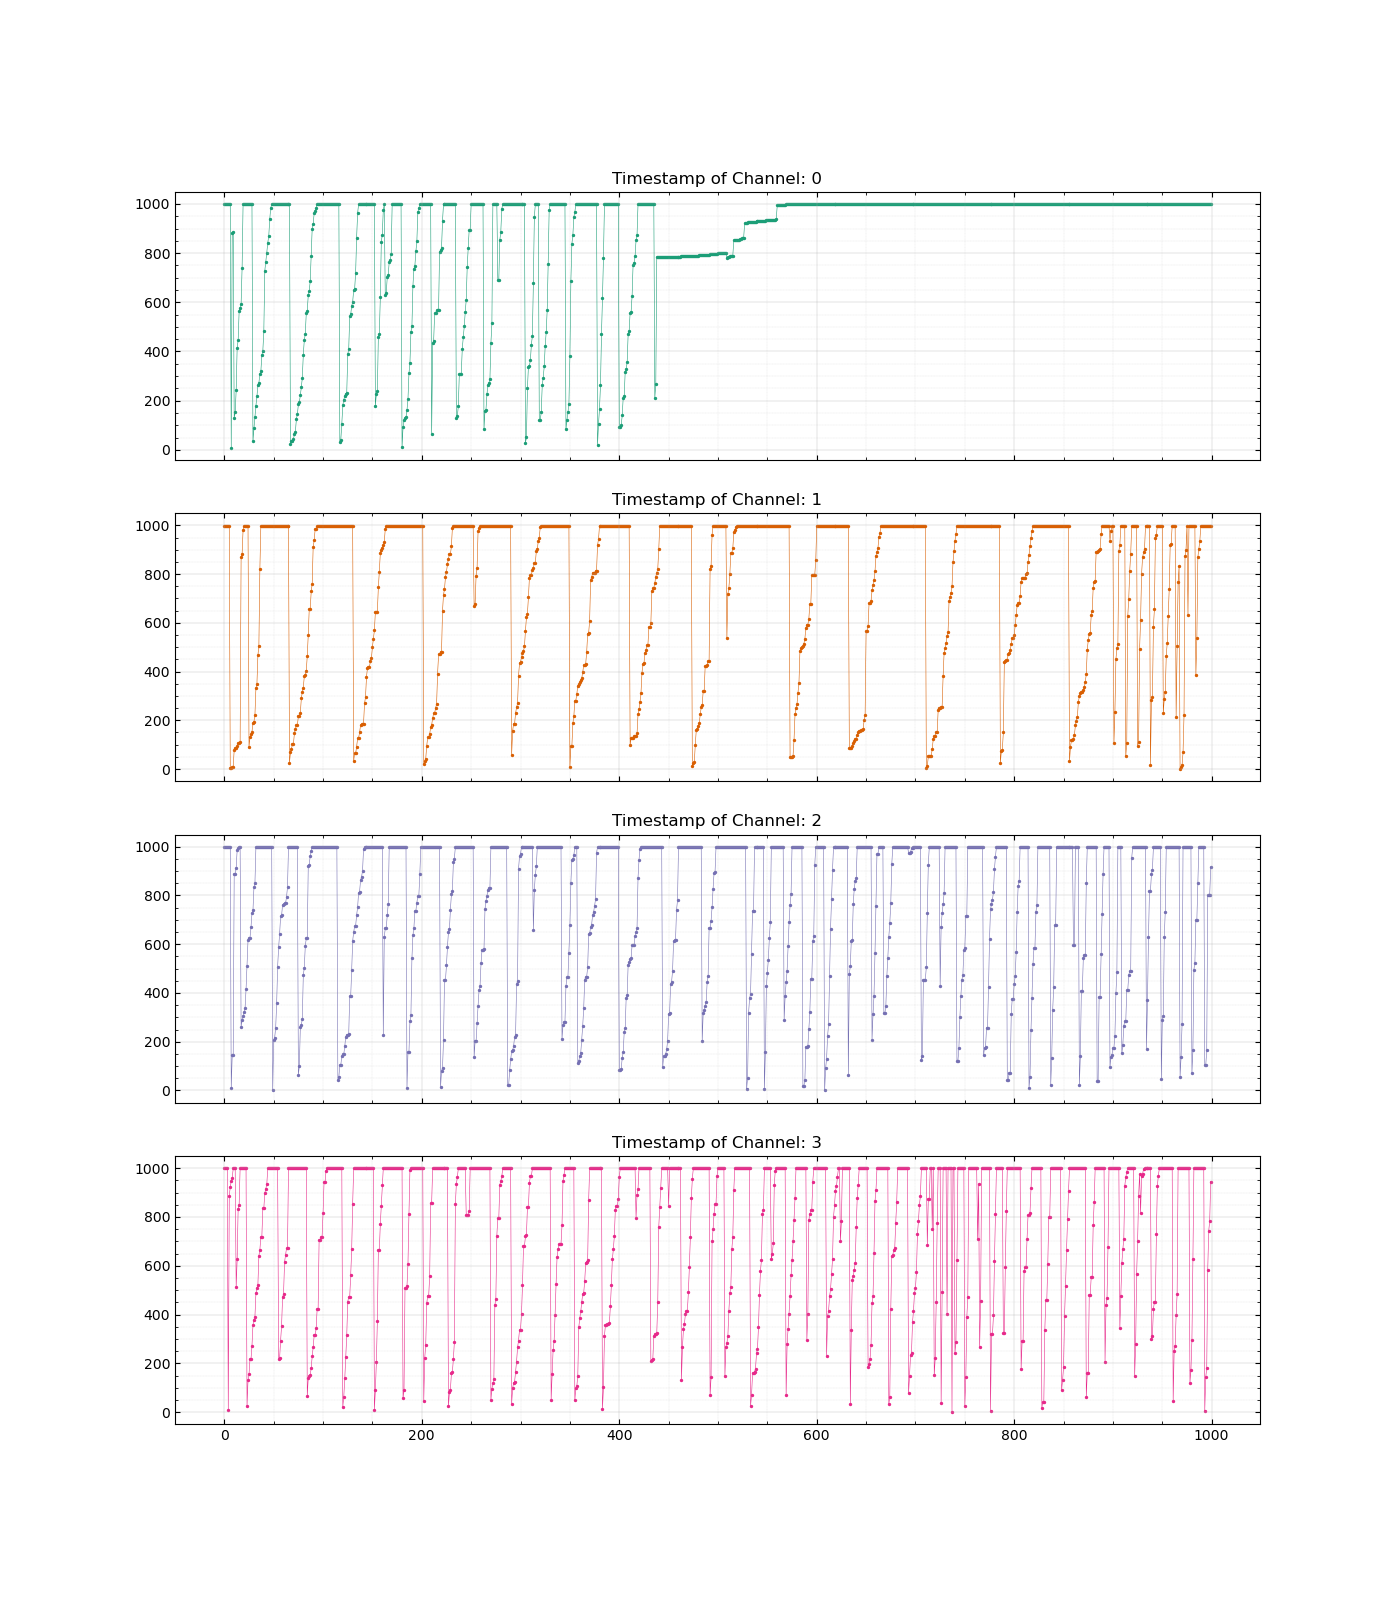

In [26]:
# Plot timestamps
fig,ax = rp.plot_timestamps(data_SiPM_nv,RANGE=(0,1000),struct=rp.NONVETO_STRUCT)

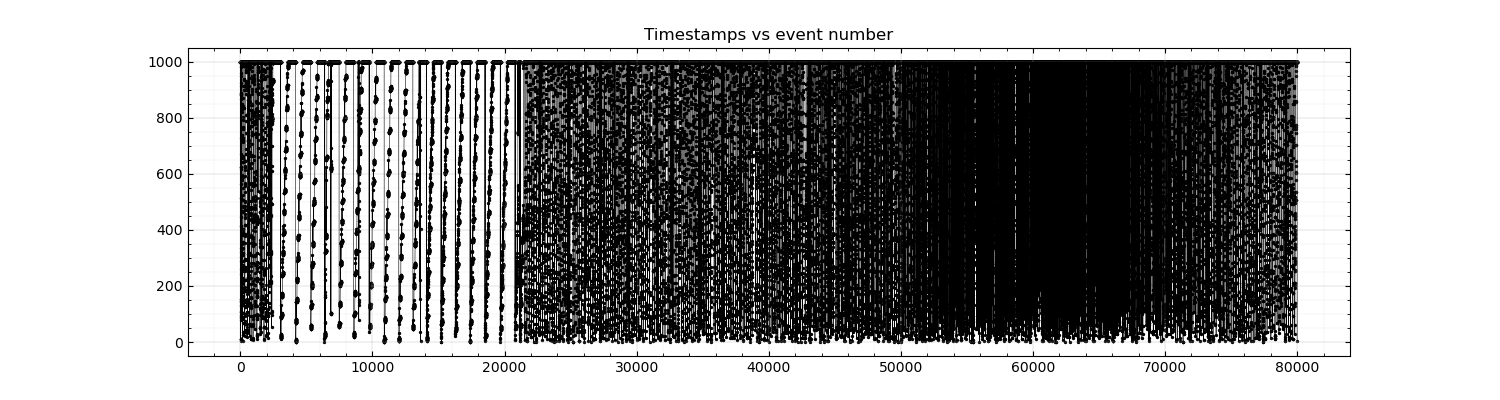

In [27]:
# Plot timestamps of all events
fig, ax = rp.plot_timestamp(data_SiPM_nv,RANGE=(0,80000))

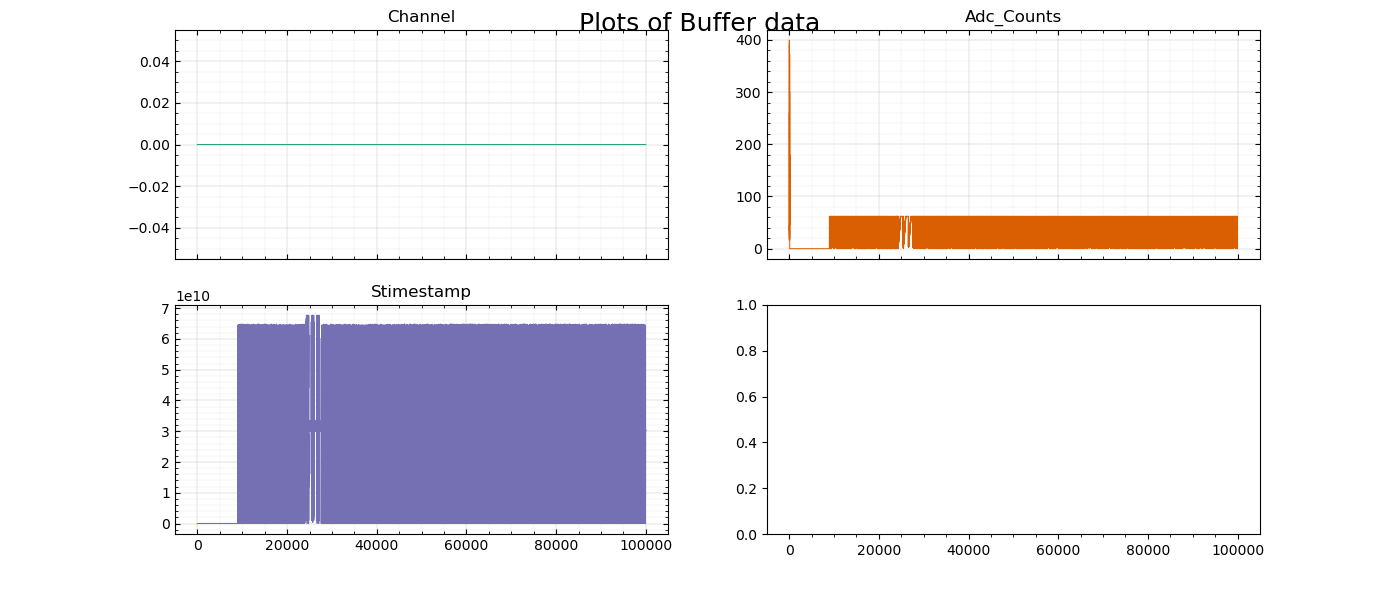

In [28]:
# Now print the PMT Data
fig, axes = rp.plot_buffer(data_PMT_nv)

AttributeError: 'AxesSubplot' object has no attribute 'flatten'

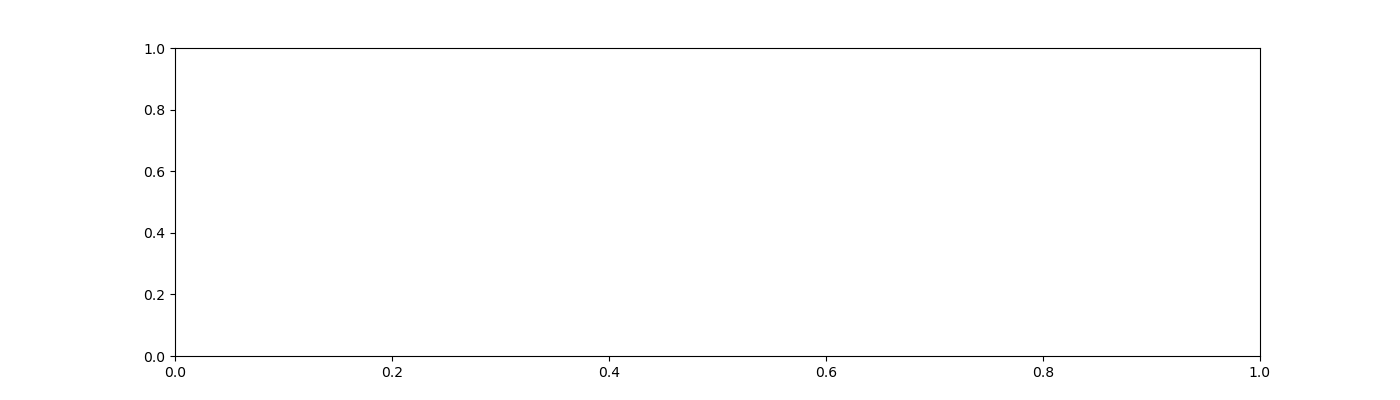

In [29]:
# Plot histograms
fig,ax = rp.plot_hists(data_PMT_nv,struct=rp.NONVETO_STRUCT,bins=200)

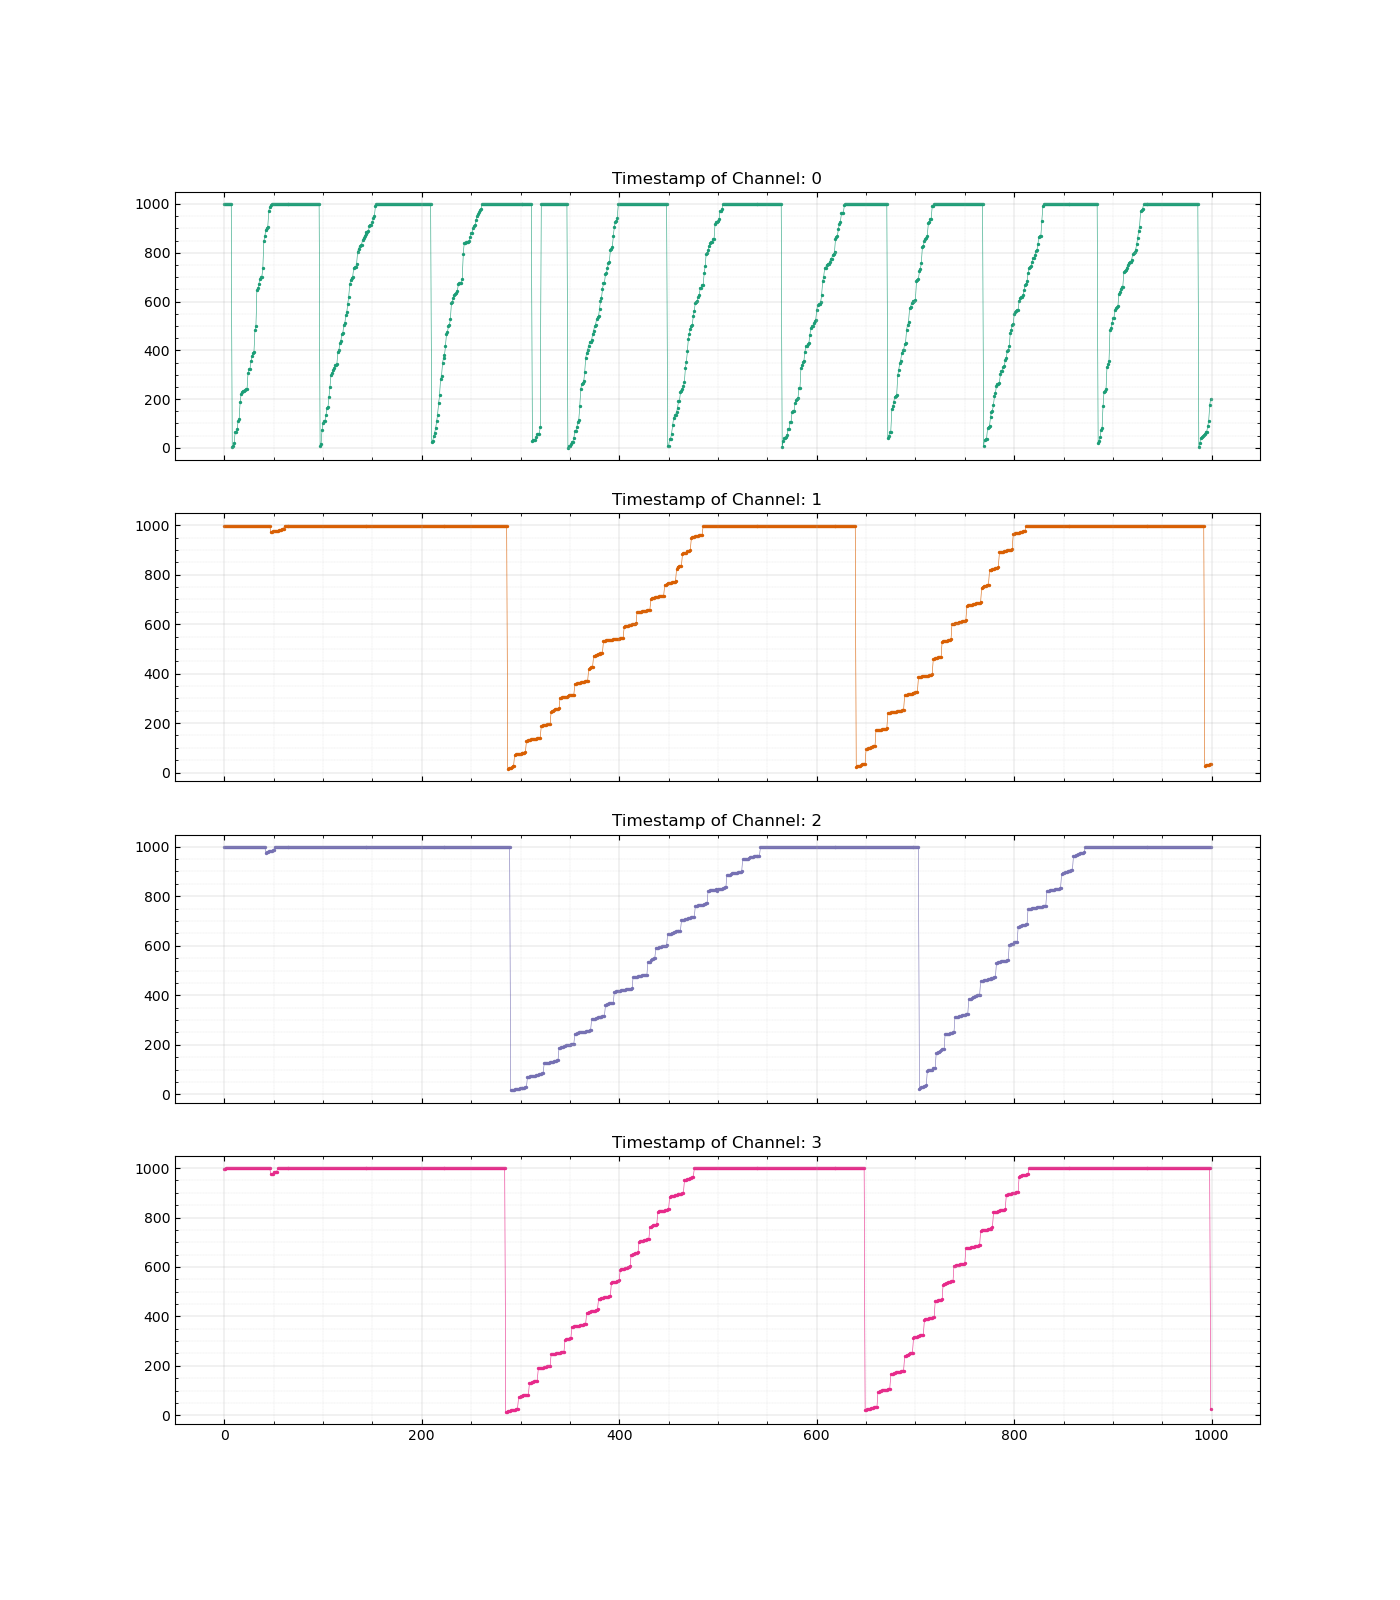

In [ ]:
# Plot timestamps
fig,ax = rp.plot_timestamps(data_PMT_nv,RANGE=(0,1000),struct=rp.NONVETO_STRUCT)

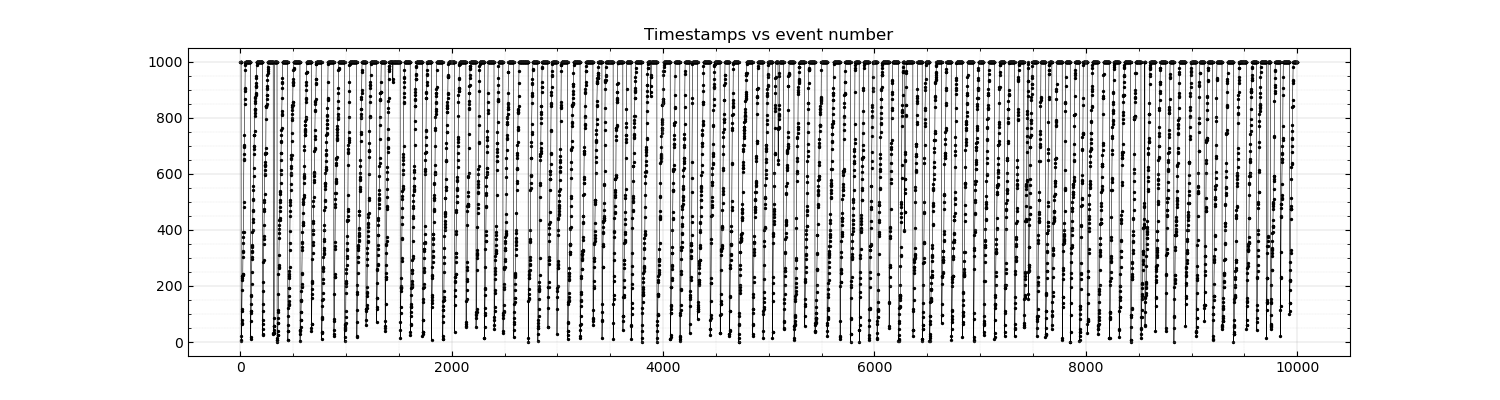

In [ ]:
# Plot timestamps of all events
fig, ax = rp.plot_timestamp(data_PMT_nv,RANGE=(0,10000))